<div align="justify">
Nomes: Fernando Veizaga, Gabriel Siqueira
</div>
<div align="center">
    <h4>Regressão Linear - Uma variável</h4>
</div>
<div align="justify">
    <p>Utilizando o arquivo data1.txt, implementaremos uma regressão linear com uma variável para prever o lucro que poderia ser obtido em um food truck utópico. Essa regressão se utilizará de todas as propriedades intrínsecas ao grandiente descente.</p>
</div>

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

with open("data2.txt", "r", encoding="utf-8") as file:
    coordinates = file.readlines()

# Separação das coordenadas entre os vetores x e y
x1 = []
y1 = []
z1 = []
for line in coordinates:
    coord = line.split(",")
    x1.append(float(coord[0]))
    y1.append(float(coord[1]))
    z1.append(float(coord[1]))

In [2]:
# Normalização das variáveis

media = []
desvio_padrao = []

media_1 = 0
media_2 = 0
media_3 = 0
dp_1 = 0
dp_2 = 0
dp_3 = 0

for k in range(0, len(x1)): # Médias
    media_1 += x1[k]
    media_2 += y1[k]
    media_3 += z1[k]
media_1 = media_1/len(x1)
media_2 = media_2/len(x1)
media_3 = media_3/len(x1)

for l in range(0, len(x1)): # Desvios padrão
    dp_1 += (x1[k]-media_1)**2
    dp_2 += (y1[k]-media_2)**2
    dp_3 += (z1[k]-media_3)**2
dp_1 = np.sqrt(dp_1/len(x1))
dp_2 = np.sqrt(dp_2/len(x1))
dp_3 = np.sqrt(dp_3/len(x1))

x = []
y = []
z = []

for m in range(0, len(x1)): # Normalização
    x.append((x1[m]-media_1)/dp_1) 
    y.append((y1[m]-media_2)/dp_2)
    z.append((z1[m]-media_3)/dp_3)

In [3]:
# Estabelecimento da hipótese

theta_0 = random.random()
theta_1 = random.random()
theta_2 = random.random()
m = len(x)
epoca = []
alpha_1 = 0.01
alpha_2 = 0.10
alpha_3 = 0.05
tempo = 0
LIMITE = 10000

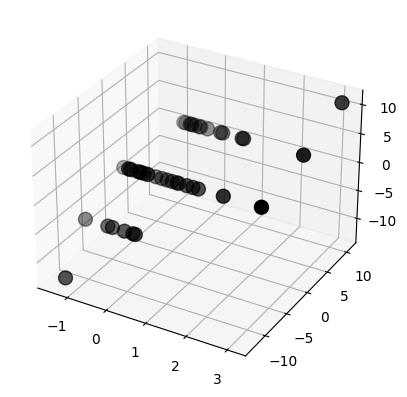

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', s=100, color='black')

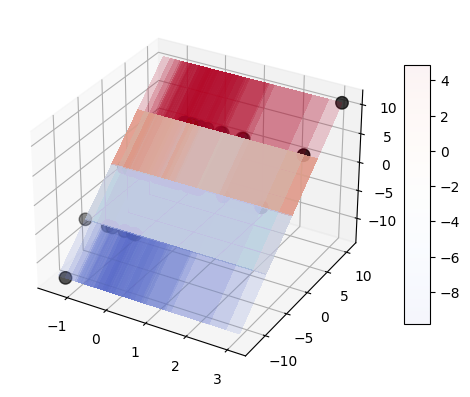

In [5]:
# Estabelecimento do código principal

while tempo < LIMITE:

    h = []
    for i in range(0, len(x)):
        h.append(theta_0+theta_1*x[i]+theta_2*y[i])

    erro = 0
    for i in range(0, len(h)):
        erro += (h[i]-z[i])**2
    J = 1/(2*m)*erro

    derivada_theta_0 = 0
    derivada_theta_1 = 0
    derivada_theta_2 = 0
    for j in range(0, len(h)):
        derivada_theta_0 += (h[j]-z[j])
        derivada_theta_1 += (h[j]-z[j])*x[j]
        derivada_theta_2 += (h[j]-z[j])*y[j]
    derivada_theta_0 = 1/m*derivada_theta_0
    derivada_theta_1 = 1/m*derivada_theta_1
    derivada_theta_2 = 1/m*derivada_theta_2

    theta_0 -= alpha_1*derivada_theta_0
    theta_1 -= alpha_2*derivada_theta_1
    theta_2 -= alpha_3*derivada_theta_2
    
    epoca.append(erro) #SSE
    tempo += 1

r, s = np.meshgrid(x, y)
h = theta_0 + theta_1*r + theta_2*s
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(r, s, h, 
                cmap=cm.coolwarm,
                alpha=0.05,        
                linewidth=0,
                antialiased=False)
ax.scatter(x, y, z, zdir='z', s=80, color='black')
fig.colorbar(surf, shrink=0.7, aspect=10)